# Data Science Tools 1 - Final Project

### Data analysis

In [ ]:
!pip install requests

In [ ]:
import requests
import pandas as pd
import zipfile
import os, sys


In [ ]:
# Download and extract ZIP files from EPA's Air Quality System (AQS) database
# This script downloads daily AQI data by county for the years 2019 to 2024 from the EPA's AQS database.
 
# Define paths
data_dir = '../data/'
data_dir_daily_aqi = '../data/daily_aqi_by_county'  # Directory to store the downloaded files

# Make sure the directory exists
os.makedirs(data_dir_daily_aqi, exist_ok=True)

# List of direct download URLs for the AQI ZIP files
zip_urls = [
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2019.zip',
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2020.zip',
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2021.zip',
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2022.zip',
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2023.zip',
    'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2024.zip'
]

# Download and extract ZIP files
for idx, url in enumerate(zip_urls, start=1):
    zip_name = f'daily_aqi_by_county_{2018 + idx}.zip'  # Naming the file based on the year
    zip_path = os.path.join(data_dir_daily_aqi, zip_name)

    # Download the ZIP file
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the download was successful
        with open(zip_path, 'wb') as file:
            file.write(response.content)
        print(f'Downloaded: {zip_path}')
    except requests.RequestException as e:
        print(f"Failed to download {url}: {e}")
        continue

    # Extract the ZIP file
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir_daily_aqi)  # Extract to the same folder
        print(f'Extracted: {zip_path}')
    except zipfile.BadZipFile:
        print(f"Error: {zip_path} is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred while extracting {zip_path}: {e}")

print("All files processed.")

In [ ]:
# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir_daily_aqi) if f.endswith('.csv')]
print("CSV files in the directory:")
for csv_file in csv_files:
    print(csv_file)

# Delete the downloaded ZIP files after extraction
zip_files = os.listdir(data_dir_daily_aqi)
for file in zip_files:
    if file.endswith('.zip'):
        os.remove(os.path.join(data_dir_daily_aqi, file))
        print(f'Deleted: {file}')

# Read and concatenate all CSV files into a single DataFrame
df_list = []
for csv_file in csv_files:
    file_path = os.path.join(data_dir_daily_aqi, csv_file)
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f'Read {csv_file} with {len(df)} rows.')
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

In [ ]:
# List all CSV files in the directory and show the first 10 rows
for csv_file in csv_files:
    csv_path = os.path.join(data_dir_daily_aqi, csv_file)
    if os.path.exists(csv_path):    
        df = pd.read_csv(csv_path)
        print(csv_file)
        print(f"Number of rows: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print(f"Columns: {df.columns.tolist()}")
        print(df.sample(5).to_string(index=False, max_cols=None))  # Display all columns in one line
        print("\n" + "="*40)

In [43]:
# Concatenate the 6 CSV files into a single DataFrame: include all US counties
# First, add a 'Year' column to each DataFrame based on the filename

dfs = []
for csv_file in csv_files:
    csv_path = os.path.join(data_dir_daily_aqi, csv_file)
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        
        # Extract the year from the last 4 digits of the filename
        year = csv_file[-8:-4]  # Assumes filename ends like 'daily_aqi_by_county_2019.csv'
        
        # Add the 'Year' column to the DataFrame
        df['Year'] = year
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)

# Display the first 10 rows of the concatenated DataFrame
print(concatenated_df.sample(6).to_string(index=False, max_cols=None))  # Display all columns in one line

# Save the concatenated DataFrame to a CSV file
output_csv_path = os.path.join(data_dir_daily_aqi, 'a1.US_daily_aqi_by_county_2019_24.csv')
concatenated_df.to_csv(output_csv_path, index=False)

# Count the number of unique states
unique_states = concatenated_df['State Name'].nunique()
print(f"\nNumber of unique states: {unique_states}")

# Count the number of records by Year
year_counts = concatenated_df['Year'].value_counts().sort_index()
print("\nNumber of records by year:", year_counts)

# List the number of records by Parameter
parameter_counts = concatenated_df['Defining Parameter'].value_counts().sort_index()
print("\nNumber of records by Parameter:", parameter_counts)


State Name county Name  State Code  County Code       Date  AQI Category Defining Parameter Defining Site  Number of Sites Reporting Year
 Wisconsin      Forest          55           41 2023-06-02   58 Moderate              Ozone   55-041-0007                          1 2023
  Colorado     Larimer           8           69 2021-03-07   52 Moderate              PM2.5   08-069-0009                          4 2021
  Kentucky        Boyd          21           19 2022-10-23   63 Moderate              PM2.5   21-019-0017                          1 2022
   Arizona      Navajo           4           17 2023-07-03   48     Good              Ozone   04-017-0119                          2 2023
  New York    Onondaga          36           67 2021-04-01   32     Good              Ozone   36-067-1015                          1 2021
  Illinois       Adams          17            1 2020-05-16   41     Good              Ozone   17-001-0007                          1 2020

Number of unique states: 54

Numb


Number of records by Parameter: Defining Parameter
Ozone    903511
PM2.5    852981
PM10      54844
NO2       19533
CO         3589
Name: count, dtype: int64


C:\Users\lm\AppData\Local\Temp\ipykernel_13232\115145737.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parameter', y='Count', data=plot_data, palette='viridis')


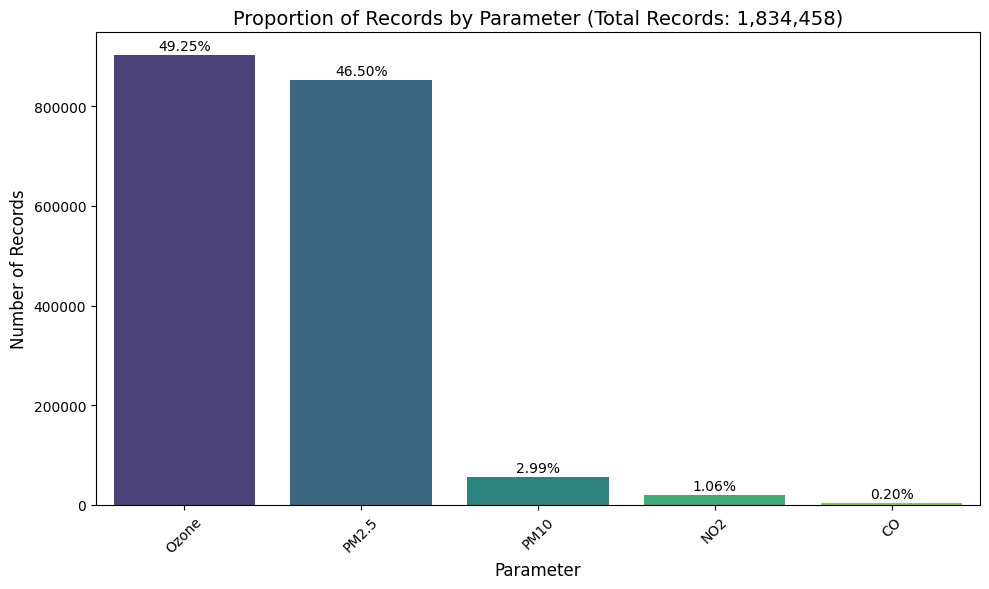

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of records
total_records = concatenated_df.shape[0]

# Calculate the number of records for each parameter and the percentage
parameter_counts = concatenated_df['Defining Parameter'].dropna().value_counts()
print("\nNumber of records by Parameter:", parameter_counts)
parameter_percentage = (parameter_counts / total_records) * 100

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Parameter': parameter_counts.index,
    'Count': parameter_counts.values,
    'Percentage': parameter_percentage.values
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Parameter', y='Count', data=plot_data, palette='viridis')

# Add the percentage labels on top of the bars
for i, row in plot_data.iterrows():
    plt.text(i, row['Count'] + 10000, f"{row['Percentage']:.2f}%", ha='center', color='black')

# Add total records as a title and format plot
plt.title(f"Proportion of Records by Parameter (Total Records: {total_records:,})", fontsize=14)
plt.xlabel('Parameter', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Extract the data only for Colorado (CO)